<a href="https://colab.research.google.com/github/iqbalhanif/Sharing-Session/blob/main/Sharing_Session_Stat_Talk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps
1. Get Data
2. Data Preprocessing for Training
3. Modeling
4. Data Preprocessing for Testing
5. Evaluation


#1. Get Data and Do  Train-Test Split
1. Get data from GitHub
2. Convert to Pandas, check dimension and data types
3. Split train and test
4. Data exploration

In [ ]:
#import important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#get data
!wget https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv

--2020-06-27 01:29:46--  https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684858 (669K) [text/plain]
Saving to: ‘Churn_Modelling.csv.5’

Churn_Modelling.csv 100%[===================>] 668.81K  --.-KB/s    in 0.1s    

2020-06-27 01:29:46 (6.77 MB/s) - ‘Churn_Modelling.csv.5’ saved [684858/684858]



In [ ]:
#convert data to pandas dataframe
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#cek dimensi data (baris, kolom) beserta nama-nama kolom
df.shape

(10000, 14)

In [ ]:
#cek tipe data
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#cek proporsi label/variabel y
pd.value_counts(df['Exited'])

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
#train-test split (secara acak)
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Exited'])
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (7000, 13)
y_train shape: (7000,)
X_test shape: (3000, 13)
y_test shape: (3000,)


In [ ]:
#gabung kembali x dan y (jika diinginkan)
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)
df_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9136,9137,15688984,Belonwu,595,France,Male,20,4,95830.43,1,1,0,177738.98,0
6410,6411,15762351,Chao,689,Spain,Female,63,1,0.00,2,1,1,186526.12,0
2607,2608,15814209,Capon,814,France,Male,31,1,118870.92,1,1,0,101704.19,0
3201,3202,15637593,Greco,722,France,Male,20,6,0.00,2,1,0,195486.28,0
3330,3331,15657439,Chao,738,France,Male,18,4,0.00,2,1,1,47799.15,0


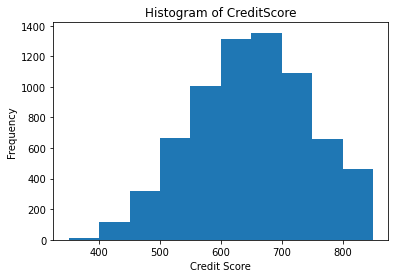

In [ ]:
#data exploration untuk numerik
df_train.CreditScore.hist()
plt.grid(False)
plt.title('Histogram of CreditScore')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

<function matplotlib.pyplot.show>

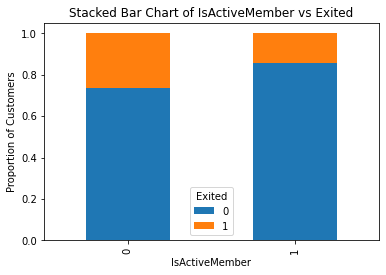

In [ ]:
#data exploration untuk binary
table=pd.crosstab(df_train.IsActiveMember,df_train.Exited)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of IsActiveMember vs Exited')
plt.xlabel('IsActiveMember')
plt.ylabel('Proportion of Customers')
plt.show

<function matplotlib.pyplot.show>

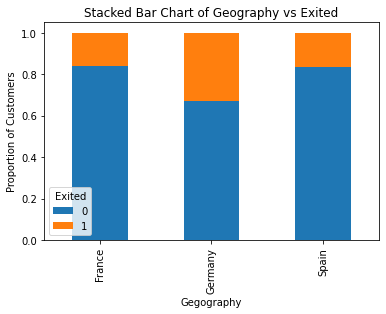

In [ ]:
#data exploration untuk categoric
table=pd.crosstab(df_train.Geography,df_train.Exited)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Geography vs Exited')
plt.xlabel('Gegography')
plt.ylabel('Proportion of Customers')
plt.show

#2. Data Preparation for Training Set
1. Split categoric, binary. an numeric variables
2. Imputation
3. Handling Outlier/CAP
4. Normalization/Standardization
5. Combine all

In [ ]:
#split categoric, binary, and numeric variables
num = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']
bin = ['HasCrCard', 'IsActiveMember']
cat = ['Geography','Gender']

In [ ]:
#check for missing value (for numerical variables)
X_train.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
#Imputation (vor numerical variables)
from sklearn.impute import SimpleImputer

def imputNumerical(x_train_numeric):
    imput = SimpleImputer(strategy="median")
    imput.fit(x_train_numeric) #cari mean per column
    
    x_train_numeric_imputed = pd.DataFrame(imput.transform(x_train_numeric)) # isi dengan mean
    x_train_numeric_imputed.columns = x_train_numeric.columns
    x_train_numeric_imputed.index = x_train_numeric.index
    
    
    return x_train_numeric_imputed, imput

In [ ]:
#cek hasil imputasi
x_imp, imp = imputNumerical(X_train[num])
x_imp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
9136,595.0,20.0,4.0,95830.43,1.0,177738.98
6410,689.0,63.0,1.0,0.00,2.0,186526.12
2607,814.0,31.0,1.0,118870.92,1.0,101704.19
3201,722.0,20.0,6.0,0.00,2.0,195486.28
3330,738.0,18.0,4.0,0.00,2.0,47799.15


In [ ]:
imp

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
#Handling Outliers, cek non_zero_std column (for numerical variables)
non_zero_std = (np.std(x_imp,axis=0) !=0)
x_imp = x_imp[x_imp.columns[non_zero_std]]

In [ ]:
#CAP
mean_X = x_imp.mean()
std_X = x_imp.std()
up_bound =  x_imp + (3*std_X)
low_bound =  x_imp - (3*std_X)
more_than_up_bound = (x_imp > mean_X + (3*std_X))
lower_than_low_bound = (x_imp < mean_X - (3*std_X))
df_filter_cap = x_imp.mask(more_than_up_bound, up_bound, axis=1) 
df_filter_cap = df_filter_cap.mask(lower_than_low_bound, low_bound, axis=1)

In [ ]:
#cek hasil cap
x_cap = df_filter_cap
x_cap.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
9136,595.0,20.0,4.0,95830.43,1.0,177738.98
6410,689.0,63.0,1.0,0.00,2.0,186526.12
2607,814.0,31.0,1.0,118870.92,1.0,101704.19
3201,722.0,20.0,6.0,0.00,2.0,195486.28
3330,738.0,18.0,4.0,0.00,2.0,47799.15


In [ ]:
#normalize (for numerical variable)
from sklearn.preprocessing import StandardScaler

def standardizer(data):
    data_columns = data.columns  # agar nama column tidak hilang
    data_index = data.index # agar index tidak hilang
    normalize = StandardScaler()
    normalize.fit(data)
    
    normalize_x = pd.DataFrame(normalize.transform(data))
    normalize_x.columns = data_columns
    normalize_x.index = data_index
    return normalize_x, normalize

In [ ]:
#cek hasil normalisasi
x_std, normalize = standardizer(x_cap)
x_std.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
9136,-0.569425,-1.540353,-0.349474,0.312906,-0.846065,1.362512
6410,0.396801,1.862389,-1.386929,-1.223574,0.709873,1.515472
2607,1.681676,-0.669884,-1.386929,0.682321,-0.846065,0.038955
3201,0.736008,-1.540353,0.342162,-1.223574,0.709873,1.671444
3330,0.900472,-1.698620,-0.349474,-1.223574,0.709873,-0.899384


In [ ]:
#imputasi untuk data kategorik
x_cat = X_train[cat].fillna(X_train[cat].mode())

In [ ]:
#create categorical dummy (for categorical variables)
x_dum=pd.get_dummies(x_cat)
x_dum.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9136,1,0,0,0,1
6410,0,0,1,1,0
2607,1,0,0,0,1
3201,1,0,0,0,1
3330,1,0,0,0,1


In [ ]:
#create x_bin (variable biner)
x_bin = X_train[bin]

In [ ]:
#combine x_cap dengan x_bin dan x_dum
x_train_new = pd.concat([x_std, x_bin, x_dum], axis=1)
x_train_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
9136,-0.569425,-1.540353,-0.349474,0.312906,-0.846065,1.362512,1,0,1,0,0,0,1
6410,0.396801,1.862389,-1.386929,-1.223574,0.709873,1.515472,1,1,0,0,1,1,0
2607,1.681676,-0.669884,-1.386929,0.682321,-0.846065,0.038955,1,0,1,0,0,0,1
3201,0.736008,-1.540353,0.342162,-1.223574,0.709873,1.671444,1,0,1,0,0,0,1
3330,0.900472,-1.698620,-0.349474,-1.223574,0.709873,-0.899384,1,1,1,0,0,0,1


In [ ]:
#cek null
x_train_new.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [ ]:
y_train.head()

9136    0
6410    0
2607    0
3201    0
3330    0
Name: Exited, dtype: int64

#3. Modeling in Train Set
1. Logistic Regression
2. Decision Tree

In [ ]:
#import packages utama
!pip install graphviz
import graphviz 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, log_loss
from scipy.stats import uniform
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
#fungsi untuk mengukur model performance
def model_performance(model, x_test, y_test):
    #Make Prediction
    y_pred       = model.predict(x_test)
    y_pred_proba = model.predict_proba(x_test)

    #Generate model performance
    print('')
    print(classification_report(y_test, y_pred))

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    print('Confusion Matrix : ' + "[" + str(tp) + "," + str(fp) + "][" + str(fn) + "," + str(tn) + "]")
    print("")

    fpr,tpr,threshold = roc_curve(y_test, y_pred)
    score_auc = auc(fpr, tpr)
    score_rocauc = roc_auc_score(y_test, y_pred_proba[:,1])

    print('Accuracy      : {0:2.6f}'.format((tp+tn)*1./(tp+fp+tn+fn)))
    print('Sensitivity   : {0:2.6f}'.format((tp)*1./(tp+fn)))
    print('Spesificity   : {0:2.6f}'.format((tn)*1./(tn+fp)))
    print('Precision     : {0:2.6f}'.format((tp)*1./(tp+fp)))
    print('ROC AUC Score : {0:2.6f}'.format(score_rocauc))
    print('AUC Score     : {0:2.6f}'.format(score_auc))

    bench = y_train.value_counts(normalize=True)
    print('')
    print('Benchmark : ')
    print(bench)
    
    return fpr, tpr, score_auc, y_pred, y_pred_proba

In [ ]:
#modelling logistic regression
logit = LogisticRegression()
result_logit = logit.fit(x_train_new, y_train)
result_logit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#evaluasi model regresi logistik
fpr_logit0, tpr_logit0, score_auc_logit0, y_pred_logit0, y_pred_proba_logit0 = model_performance(logit,x_train_new,y_train)


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5574
           1       0.52      0.12      0.20      1426

    accuracy                           0.80      7000
   macro avg       0.67      0.55      0.54      7000
weighted avg       0.75      0.80      0.74      7000

Confusion Matrix : [175,162][1251,5412]

Accuracy      : 0.798143
Sensitivity   : 0.122721
Spesificity   : 0.970936
Precision     : 0.519288
ROC AUC Score : 0.742736
AUC Score     : 0.546829

Benchmark : 
0    0.796286
1    0.203714
Name: Exited, dtype: float64


In [ ]:
#cek koefisien regresi logistik
coef_table = pd.DataFrame(list(x_train_new.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",result_logit.coef_.transpose())
coef_table

,0,Coefs
0,CreditScore,-0.113247
1,Age,0.531992
2,Tenure,0.000665
3,Balance,0.179236
4,NumOfProducts,0.049328
5,EstimatedSalary,0.045563
6,HasCrCard,-0.044675
7,IsActiveMember,-0.950042
8,Geography_France,-0.273914
9,Geography_Germany,0.511590


In [ ]:
#modelling decision tree 
dt = DecisionTreeClassifier()
result_dt = dt.fit(x_train_new, y_train)
result_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#evaluasi model decision tree
fpr_logit1, tpr_logit1, score_auc_logit1, y_pred_logit1, y_pred_proba_logit1 = model_performance(dt,x_train_new,y_train)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00      1426

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000

Confusion Matrix : [1426,0][0,5574]

Accuracy      : 1.000000
Sensitivity   : 1.000000
Spesificity   : 1.000000
Precision     : 1.000000
ROC AUC Score : 1.000000
AUC Score     : 1.000000

Benchmark : 
0    0.796286
1    0.203714
Name: Exited, dtype: float64


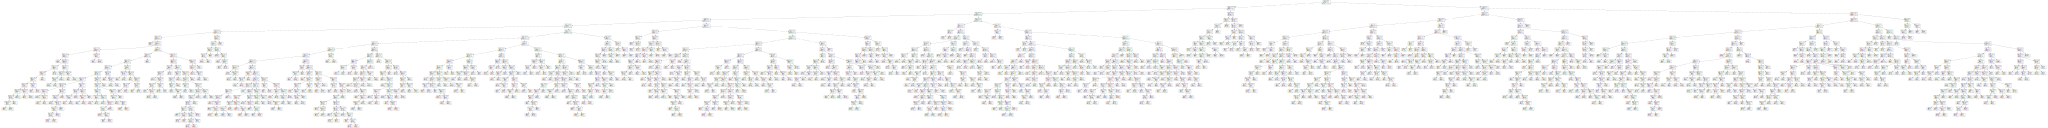

In [ ]:
#cek pohon decision tree
dot_data = tree.export_graphviz(result_dt, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

#4. Data Preparation for Testing Set
1. Split categoric, binary. an numeric variables
2. Imputation
3. Handling Outlier/CAP
4. Normalization/Standardization
5. Combine all

---



In [ ]:
#split categoric and numeric variables
num = ['CreditScore', 'Age','Tenure','Balance','NumOfProducts', 'EstimatedSalary']
bin = ['HasCrCard', 'IsActiveMember']
cat = ['Geography','Gender']

In [ ]:
#check for missing value
X_test.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [ ]:
#Imputation (for numerical variables)
from sklearn.impute import SimpleImputer

def imputNumerical(x_train_numeric):
    imput = SimpleImputer(strategy="median")
    imput.fit(x_train_numeric) #cari mean per column
    
    x_train_numeric_imputed = pd.DataFrame(imput.transform(x_train_numeric)) # isi dengan mean
    x_train_numeric_imputed.columns = x_train_numeric.columns
    x_train_numeric_imputed.index = x_train_numeric.index
    
    
    return x_train_numeric_imputed, imput

In [ ]:
#cek hasil imputasi
x_imp, imp = imputNumerical(X_test[num])
x_imp.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
6417,790.0,37.0,6.0,0.00,2.0,119484.01
199,521.0,35.0,6.0,96423.84,1.0,10488.44
2051,712.0,37.0,1.0,106881.50,2.0,169386.81
8481,729.0,38.0,10.0,0.00,2.0,189727.12
1071,695.0,52.0,8.0,103023.26,1.0,22485.64


In [ ]:
imp

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
#Handling Outliers (for numerical variables)
non_zero_std = (np.std(x_imp,axis=0) !=0)
x_imp = x_imp[x_imp.columns[non_zero_std]]

In [ ]:
#CAP
mean_X = x_imp.mean()
std_X = x_imp.std()
up_bound =  x_imp + (3*std_X)
low_bound =  x_imp - (3*std_X)
more_than_up_bound = (x_imp > mean_X + (3*std_X))
lower_than_low_bound = (x_imp < mean_X - (3*std_X))
df_filter_cap = x_imp.mask(more_than_up_bound, up_bound, axis=1) 
df_filter_cap = df_filter_cap.mask(lower_than_low_bound, low_bound, axis=1)

In [ ]:
#cek hasil cap
x_cap = df_filter_cap
x_cap.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
6417,790.0,37.0,6.0,0.00,2.0,119484.01
199,521.0,35.0,6.0,96423.84,1.0,10488.44
2051,712.0,37.0,1.0,106881.50,2.0,169386.81
8481,729.0,38.0,10.0,0.00,2.0,189727.12
1071,695.0,52.0,8.0,103023.26,1.0,22485.64


In [ ]:
#normalize (for numerical variables)
from sklearn.preprocessing import StandardScaler

def standardizer(data):
    data_columns = data.columns  # agar nama column tidak hilang
    data_index = data.index # agar index tidak hilang
    normalize = StandardScaler()
    normalize.fit(data)
    
    normalize_x = pd.DataFrame(normalize.transform(data))
    normalize_x.columns = data_columns
    normalize_x.index = data_index
    return normalize_x, normalize

In [ ]:
#cek hasil normalisasi
x_std, normalize = standardizer(x_cap)
x_std.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
6417,1.418033,-0.176453,0.339462,-1.231183,0.740703,0.311305
199,-1.307835,-0.343460,0.339462,0.312864,-0.846933,-1.580263
2051,0.627633,-0.176453,-1.388961,0.480323,0.740703,1.177345
8481,0.799899,-0.092949,1.722202,-1.231183,0.740703,1.530341
1071,0.455366,1.076099,1.030832,0.418541,-0.846933,-1.372057


In [ ]:
#imputasi untuk data kategorik
x_cat = X_test[cat].fillna(X_test[cat].mode())

In [ ]:
#create categorical dummy (for catbegorical variables)
x_dum=pd.get_dummies(x_cat)
x_dum.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6417,0,0,1,0,1
199,1,0,0,0,1
2051,1,0,0,1,0
8481,0,0,1,1,0
1071,0,1,0,0,1


In [ ]:
#create x_bin (for binary variables)
x_bin = X_test[bin]

In [ ]:
#combine x_cap dengan c_bin dan c_dum
x_test_new = pd.concat([x_std, x_bin, x_dum], axis=1)
x_test_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6417,1.418033,-0.176453,0.339462,-1.231183,0.740703,0.311305,1,1,0,0,1,0,1
199,-1.307835,-0.343460,0.339462,0.312864,-0.846933,-1.580263,1,0,1,0,0,0,1
2051,0.627633,-0.176453,-1.388961,0.480323,0.740703,1.177345,0,0,1,0,0,1,0
8481,0.799899,-0.092949,1.722202,-1.231183,0.740703,1.530341,1,0,0,0,1,1,0
1071,0.455366,1.076099,1.030832,0.418541,-0.846933,-1.372057,1,1,0,1,0,0,1


In [ ]:
#cek null
x_test_new.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
Gender_Female        0
Gender_Male          0
dtype: int64

In [ ]:
y_test.head()

6417    0
199     0
2051    0
8481    0
1071    0
Name: Exited, dtype: int64

#5. Evaluate on Testing Set
1. Logistic Regression
2. Decision Tree

In [ ]:
#valuasi model regresi logistik dengan data testing
fpr_logit0, tpr_logit0, score_auc_logit0, y_pred_logit0, y_pred_proba_logit0 = model_performance(logit,x_test_new,y_test)


              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2389
           1       0.58      0.15      0.24       611

    accuracy                           0.81      3000
   macro avg       0.70      0.56      0.56      3000
weighted avg       0.77      0.81      0.76      3000

Confusion Matrix : [93,66][518,2323]

Accuracy      : 0.805333
Sensitivity   : 0.152209
Spesificity   : 0.972373
Precision     : 0.584906
ROC AUC Score : 0.768400
AUC Score     : 0.562291

Benchmark : 
0    0.796286
1    0.203714
Name: Exited, dtype: float64


In [ ]:
#evaluasi model decision tree dengan data testing
fpr_logit1, tpr_logit1, score_auc_logit1, y_pred_logit1, y_pred_proba_logit1 = model_performance(dt,x_test_new,y_test)


              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2389
           1       0.50      0.52      0.51       611

    accuracy                           0.80      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.80      0.80      0.80      3000

Confusion Matrix : [319,323][292,2066]

Accuracy      : 0.795000
Sensitivity   : 0.522095
Spesificity   : 0.864797
Precision     : 0.496885
ROC AUC Score : 0.693446
AUC Score     : 0.693446

Benchmark : 
0    0.796286
1    0.203714
Name: Exited, dtype: float64
